<a href="https://colab.research.google.com/github/s5263er/GameStop-Sentiment-and-Price-Analysis/blob/main/BestBuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install yfinance
import yfinance as yf
import pandas as pd
import datetime 
import datetime 
import matplotlib.pyplot as plt
import math
import string
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
#LAST 10 YEAR STOCK PRICE
start = datetime.datetime(2013,3,28) 
end = datetime.datetime(2023, 3 ,28)
GME = yf.Ticker("BBY") 
df_gme = GME.history(start=start, end=end)
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2013-03-28 00:00:00-04:00,16.298781,16.555976,16.166509,16.276735,8861600,0.00,0.0
2013-04-01 00:00:00-04:00,16.262045,16.504543,15.901973,15.931367,6090200,0.00,0.0
2013-04-02 00:00:00-04:00,15.982800,16.313479,15.850528,15.901967,7679200,0.00,0.0
2013-04-03 00:00:00-04:00,15.968106,16.225301,15.777047,15.909319,7599400,0.00,0.0
2013-04-04 00:00:00-04:00,15.960758,18.591491,15.953410,18.466568,55397700,0.00,0.0
...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,78.174151,78.539776,76.425085,76.849998,3634100,0.00,0.0
2023-03-22 00:00:00-04:00,77.349998,77.989998,75.900002,75.940002,2522200,0.92,0.0
2023-03-23 00:00:00-04:00,76.000000,76.660004,73.940002,74.589996,2161000,0.00,0.0


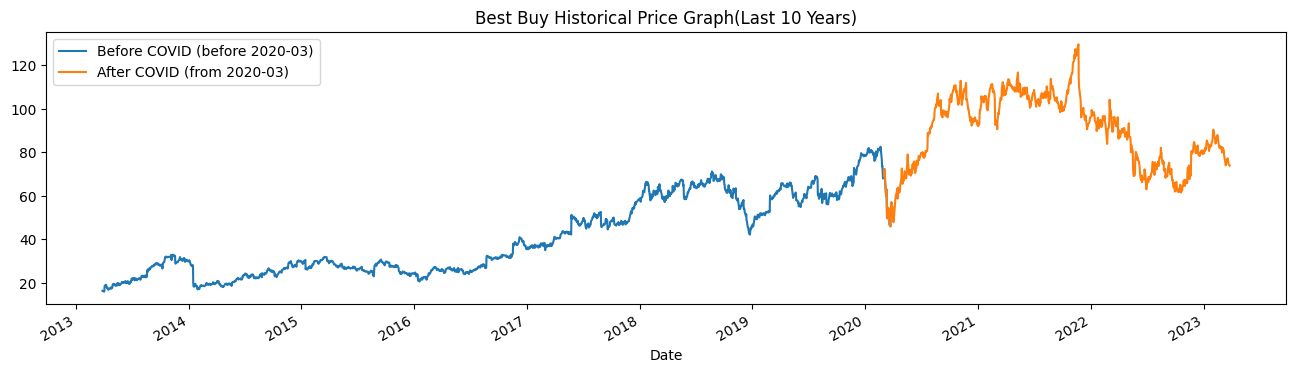

In [36]:
import matplotlib.pyplot as plt
df_gme["Close"][:'2020-03'].plot(figsize=(16,4), legend=True)
df_gme["Close"]["2020-03":].plot(figsize=(16,4), legend=True)
plt.legend(["Before COVID (before 2020-03)", "After COVID (from 2020-03)"])
plt.title("Best Buy Historical Price Graph(Last 10 Years)")
plt.show()
plt.close()

In [37]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
df_gme = df_gme.rename(columns={'Date': 'date'})


In [39]:
df_gme['date'] = df_gme.index.date
df_gme['date'] = pd.to_datetime(df_gme['date'])

In [40]:
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2013-03-28 00:00:00-04:00,16.298781,16.555976,16.166509,16.276735,8861600,0.00,0.0,2013-03-28
2013-04-01 00:00:00-04:00,16.262045,16.504543,15.901973,15.931367,6090200,0.00,0.0,2013-04-01
2013-04-02 00:00:00-04:00,15.982800,16.313479,15.850528,15.901967,7679200,0.00,0.0,2013-04-02
2013-04-03 00:00:00-04:00,15.968106,16.225301,15.777047,15.909319,7599400,0.00,0.0,2013-04-03
2013-04-04 00:00:00-04:00,15.960758,18.591491,15.953410,18.466568,55397700,0.00,0.0,2013-04-04
...,...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,78.174151,78.539776,76.425085,76.849998,3634100,0.00,0.0,2023-03-21
2023-03-22 00:00:00-04:00,77.349998,77.989998,75.900002,75.940002,2522200,0.92,0.0,2023-03-22
2023-03-23 00:00:00-04:00,76.000000,76.660004,73.940002,74.589996,2161000,0.00,0.0,2023-03-23


In [41]:
df_gme

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
Date,,,,,,,,
2013-03-28 00:00:00-04:00,16.298781,16.555976,16.166509,16.276735,8861600,0.00,0.0,2013-03-28
2013-04-01 00:00:00-04:00,16.262045,16.504543,15.901973,15.931367,6090200,0.00,0.0,2013-04-01
2013-04-02 00:00:00-04:00,15.982800,16.313479,15.850528,15.901967,7679200,0.00,0.0,2013-04-02
2013-04-03 00:00:00-04:00,15.968106,16.225301,15.777047,15.909319,7599400,0.00,0.0,2013-04-03
2013-04-04 00:00:00-04:00,15.960758,18.591491,15.953410,18.466568,55397700,0.00,0.0,2013-04-04
...,...,...,...,...,...,...,...,...
2023-03-21 00:00:00-04:00,78.174151,78.539776,76.425085,76.849998,3634100,0.00,0.0,2023-03-21
2023-03-22 00:00:00-04:00,77.349998,77.989998,75.900002,75.940002,2522200,0.92,0.0,2023-03-22
2023-03-23 00:00:00-04:00,76.000000,76.660004,73.940002,74.589996,2161000,0.00,0.0,2023-03-23


In [42]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Set up the queries and limits for the two loops
query1 = "Best Buy since:2020-03-08 until:2020-03-14 -filter:retweets"
query2 = "Best Buy since:2020-03-15 until:2020-03-21 -filter:retweets"
query3 = "Best Buy since:2020-03-22 until:2020-03-28 -filter:retweets"

limit1 = 15000
limit2 = 15000
limit3 = 15000

# Loop 1: search for tweets in the first date range
tweets1_corona = []
for tweet in sntwitter.TwitterSearchScraper(query1).get_items():
    if len(tweets1_corona) == limit1:
        break
    else:
        tweets1_corona.append([tweet.date, tweet.content])
    if len(tweets1_corona) == 500:
        print(500)
    if len(tweets1_corona) == 10000:
        print(10000)

# Loop 2: search for tweets in the second date range
tweets2_corona = []
for tweet in sntwitter.TwitterSearchScraper(query2).get_items():
    if len(tweets2_corona) == limit2:
        break
    else:
        tweets2_corona.append([tweet.date, tweet.content])
    if len(tweets2_corona) == 500:
        print(500)
    if len(tweets2_corona) == 10000:
        print(10000)

tweets3_corona = []
for tweet in sntwitter.TwitterSearchScraper(query3).get_items():
    if len(tweets3_corona) == limit3:
        break
    else:
        tweets3_corona.append([tweet.date, tweet.content])
    if len(tweets3_corona) == 500:
        print(500)
    if len(tweets3_corona) == 10000:
        print(10000)

#Merge the results into one dataframe
tweets_corona = tweets1_corona + tweets2_corona + tweets3_corona
df_twitter_corona = pd.DataFrame(tweets_corona, columns=['date', 'Tweet'])
df_twitter_corona

<ipython-input-43-1094742d423f>:19: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets1_corona.append([tweet.date, tweet.content])


500


<ipython-input-43-1094742d423f>:31: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets2_corona.append([tweet.date, tweet.content])


500
10000


<ipython-input-43-1094742d423f>:42: DeprecatedFeatureWarning: content is deprecated, use rawContent instead
  tweets3_corona.append([tweet.date, tweet.content])


500
10000


,date,Tweet
0,2020-03-13 23:57:24+00:00,@MKBHD Otterbox Commuter on ms S10+. I PRE-ord...
1,2020-03-13 23:57:07+00:00,@Wejlord You work retail? I worked at Best Buy...
2,2020-03-13 23:56:47+00:00,I’ve had 2 customers ask me where they can fin...
3,2020-03-13 23:56:28+00:00,DSの辞任ラッシュ来たーーー（＾ｑ＾*飯ウマ過ぎる\n逃げる？逃げる？何処に？！地下？潜水艦...
4,2020-03-13 23:55:47+00:00,god i really hope we can all pick up animal cr...
...,...,...
29402,2020-03-22 00:01:06+00:00,I am so disappointed with how I was treated at...
29403,2020-03-22 00:00:55+00:00,You can find these headphones anywhere: Best B...
29404,2020-03-22 00:00:48+00:00,Best Buy is stupid and inconsiderate don't tel...
29405,2020-03-22 00:00:47+00:00,Yo I came to pick up a headset that I need for...


In [44]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# initialize the analyzer
analyzer = SentimentIntensityAnalyzer()

# define a function to get the mean sentiment score for a row
def get_sentiment_score(row):
    title_score = analyzer.polarity_scores(row['Tweet'])['compound']
    return title_score

# convert the 'date' column to datetime
df_twitter_corona['date'] = pd.to_datetime(df_twitter_corona['date'])

# apply the function to each row to get the sentiment score
df_twitter_corona['sentiment'] = df_twitter_corona.apply(get_sentiment_score, axis=1)

# drop rows where sentiment == 0
df_twitter_corona = df_twitter_corona[df_twitter_corona['sentiment'] != 0]

# extract the date from the datetime column and convert it to a string
df_twitter_corona['date'] = df_twitter_corona['date'].dt.strftime('%Y-%m-%d')

# calculate the mean sentiment score for each date
df_twitter_corona['sentiment_avg'] = df_twitter_corona.groupby('date')['sentiment'].transform('mean')
df_twitter_corona['num_tweets'] = df_twitter_corona.groupby('date')['date'].transform('count')

# print the updated dataframe
df_twitter_corona

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-44-d88a44f7b1ef>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_corona['date'] = df_twitter_corona['date'].dt.strftime('%Y-%m-%d')
<ipython-input-44-d88a44f7b1ef>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_corona['sentiment_avg'] = df_twitter_corona.groupby('date')['sentiment'].transform('mean')
<ipython-input-44-d88a44f7b1ef>:26: Setti

,date,Tweet,sentiment,sentiment_avg,num_tweets
0,2020-03-13,@MKBHD Otterbox Commuter on ms S10+. I PRE-ord...,0.6369,0.538444,1510
1,2020-03-13,@Wejlord You work retail? I worked at Best Buy...,0.7691,0.538444,1510
4,2020-03-13,god i really hope we can all pick up animal cr...,0.9080,0.538444,1510
6,2020-03-13,@briannarlewis @gordovegan My boi pre-ordered ...,0.7906,0.538444,1510
7,2020-03-13,"If people start looting, I’m hitting Best Buy ...",0.4588,0.538444,1510
...,...,...,...,...,...
29402,2020-03-22,I am so disappointed with how I was treated at...,-0.7237,0.535764,2180
29403,2020-03-22,You can find these headphones anywhere: Best B...,0.6369,0.535764,2180
29404,2020-03-22,Best Buy is stupid and inconsiderate don't tel...,0.4735,0.535764,2180
29405,2020-03-22,Yo I came to pick up a headset that I need for...,0.3818,0.535764,2180


In [45]:
df_twitter_corona['date'] = pd.to_datetime(df_twitter_corona['date'], format='%Y-%m-%d')

<ipython-input-45-ff2af43edfaa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_twitter_corona['date'] = pd.to_datetime(df_twitter_corona['date'], format='%Y-%m-%d')


In [46]:
df_gme['date'] = pd.to_datetime(df_gme['date'], format='%Y-%m-%d')


In [47]:
merged_df_twitter_corona = pd.merge(df_gme, df_twitter_corona, on='date', how='left')

# filter out rows with dates outside the range of interest
start_date = pd.Timestamp('2020-03-09')
end_date = pd.Timestamp('2020-03-27')
merged_df_twitter_corona = merged_df_twitter_corona[(merged_df_twitter_corona['date'] >= start_date) & (merged_df_twitter_corona['date'] <= end_date)]

# group by date and aggregate the sentiment values
merged_df_twitter_corona = merged_df_twitter_corona.groupby('date').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'max', 'Dividends': 'max', 'Stock Splits': 'max', 'sentiment_avg': 'max', 'num_tweets': 'max'})

# reset the index to include the "date" column
merged_df_twitter_corona = merged_df_twitter_corona.reset_index()
#merged_df_gme['avg_price'] = merged_df_gme[['Open', 'High', 'Low', 'Close']].mean(axis=1)
#USE CLOSING PRICE 
# print the resulting dataframe
merged_df_twitter_corona['PriceChg'] = (merged_df_twitter_corona['Close'] - merged_df_twitter_corona['Open']) / merged_df_twitter_corona['Open']

merged_df_twitter_corona

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,sentiment_avg,num_tweets,PriceChg
0,2020-03-09,60.804442,62.590701,59.296449,60.023521,3959200,0.00,0.0,0.560567,708.0,-0.012843
1,2020-03-10,62.285511,63.380602,59.619593,62.940773,2767700,0.00,0.0,0.527431,904.0,0.010520
2,2020-03-11,60.894193,61.073720,57.303737,58.677090,3652400,0.00,0.0,0.551825,905.0,-0.036409
3,2020-03-12,53.847936,54.072340,49.548359,49.727882,3948400,0.00,0.0,0.549104,1011.0,-0.076513
4,2020-03-13,52.959292,55.185377,48.821286,54.808380,4209700,0.00,0.0,0.538444,1510.0,0.034915
5,2020-03-16,48.471206,51.514120,43.992106,51.433334,5346600,0.00,0.0,0.481407,1270.0,0.061111
6,2020-03-17,52.348905,54.960964,49.656060,54.144135,7026600,0.00,0.0,0.479331,1942.0,0.034294
7,2020-03-18,50.004287,52.495442,45.203151,48.917236,5066800,0.55,0.0,0.487763,2025.0,-0.021739
8,2020-03-19,47.567481,53.636842,43.581634,49.596642,4186700,0.00,0.0,0.485066,2566.0,0.042659
9,2020-03-20,50.375696,52.540736,46.734079,46.788433,3851900,0.00,0.0,0.496798,2829.0,-0.071210


                 Volume  sentiment_avg     Close  PriceChg  num_tweets
Volume         1.000000      -0.555139 -0.434163  0.131943    0.359170
sentiment_avg -0.555139       1.000000  0.481843 -0.338712   -0.729536
Close         -0.434163       0.481843  1.000000  0.190309   -0.698212
PriceChg       0.131943      -0.338712  0.190309  1.000000   -0.028768
num_tweets     0.359170      -0.729536 -0.698212 -0.028768    1.000000


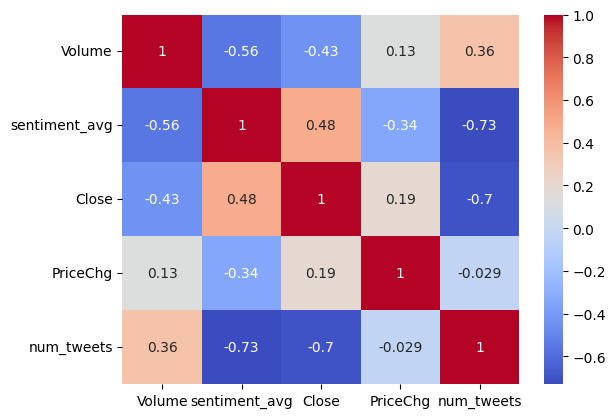

In [48]:
merged_df_twitter_corona['Volume'] = (merged_df_twitter_corona['Volume'] - merged_df_twitter_corona['Volume'].mean()) / merged_df_twitter_corona['Volume'].std()
merged_df_twitter_corona['sentiment_avg'] = (merged_df_twitter_corona['sentiment_avg'] - merged_df_twitter_corona['sentiment_avg'].mean()) / merged_df_twitter_corona['sentiment_avg'].std()
merged_df_twitter_corona['Close'] = (merged_df_twitter_corona['Close'] - merged_df_twitter_corona['Close'].mean()) / merged_df_twitter_corona['Close'].std()
merged_df_twitter_corona['PriceChg'] = (merged_df_twitter_corona['PriceChg'] - merged_df_twitter_corona['PriceChg'].mean()) / merged_df_twitter_corona['PriceChg'].std()
merged_df_twitter_corona['num_tweets'] = (merged_df_twitter_corona['num_tweets'] - merged_df_twitter_corona['num_tweets'].mean()) / merged_df_twitter_corona['num_tweets'].std()

# compute the correlation matrix
corr_matrix = merged_df_twitter_corona[['Volume', 'sentiment_avg', 'Close','PriceChg',"num_tweets"]].corr()

# display the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# show the plot
plt.show()

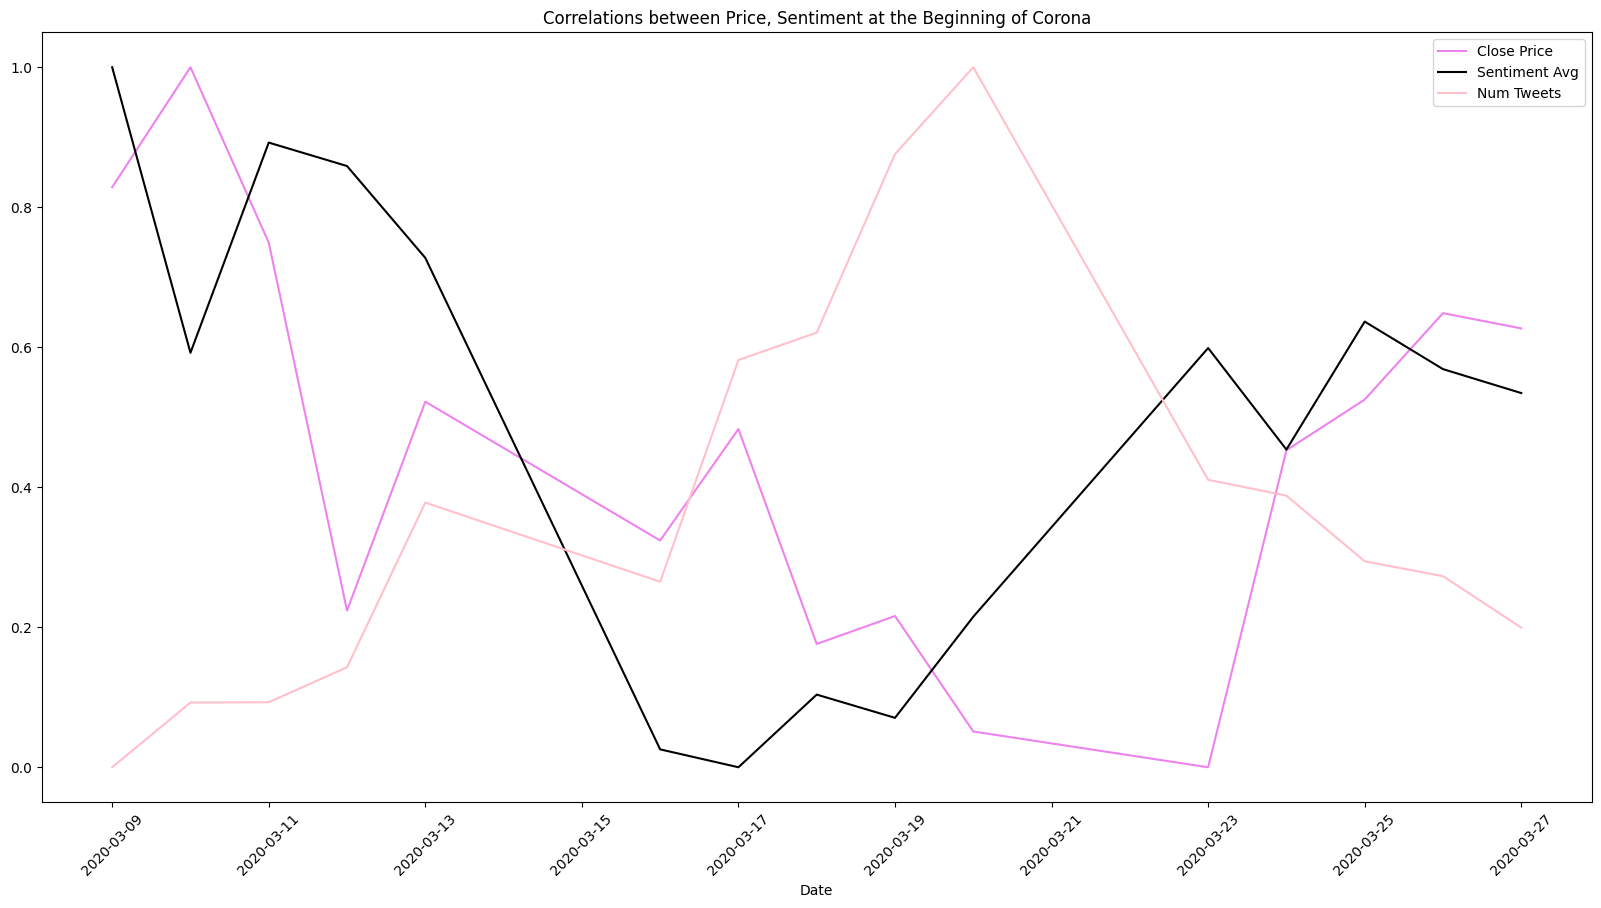

In [49]:
# normalize the data using min-max scaling
avg_price_norm = (merged_df_twitter_corona['Close'] - merged_df_twitter_corona['Close'].min()) / (merged_df_twitter_corona['Close'].max() - merged_df_twitter_corona['Close'].min())
sentiment_norm = (merged_df_twitter_corona['sentiment_avg'] - merged_df_twitter_corona['sentiment_avg'].min()) / (merged_df_twitter_corona['sentiment_avg'].max() - merged_df_twitter_corona['sentiment_avg'].min())
num_tweets_norm = (merged_df_twitter_corona['num_tweets'] - merged_df_twitter_corona['num_tweets'].min()) / (merged_df_twitter_corona['num_tweets'].max() - merged_df_twitter_corona['num_tweets'].min())

# create a figure and axis object
fig, ax = plt.subplots(figsize = (20,10))

# plot the normalized data on the same y-axis
ax.plot(merged_df_twitter_corona['date'], avg_price_norm, color='violet', label='Close Price')
ax.plot(merged_df_twitter_corona['date'], sentiment_norm, color='black', label='Sentiment Avg')
ax.plot(merged_df_twitter_corona['date'], num_tweets_norm, color='pink', label='Num Tweets')

# set the x-axis label and title
ax.set_xlabel('Date')
ax.set_title('Correlations between Price, Sentiment at the Beginning of Corona')

# create a legend
ax.legend()
plt.xticks(rotation=45)

# display the plot
plt.show()